<a href="https://colab.research.google.com/github/naseemkp07/TIME-SERIES_ANALIYSIS/blob/main/ARIMA_and_SARIMA_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ARIMA and Seasonal ARIMA

**Autoregressive Integrated Moving Averages**

The general process for ARIMA models is the following:




*  Visualize the Time Series Data
* Make the time series data stationary
*  Plot the Correlation and AutoCorrelation Charts

*   Construct the ARIMA Model or Seasonal ARIMA based on the data
*  Use the model to make predictions





Let's go through these steps!















In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/perrin-freres-monthly-champagne-.csv')

In [43]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [44]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [45]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [46]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [47]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [48]:
df.drop(105,axis=0,inplace=True)

In [49]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [50]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [51]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [52]:
df.set_index('Month',inplace=True)

In [53]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [54]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


**Step 2: Visualize the Data**

<Axes: xlabel='Month'>

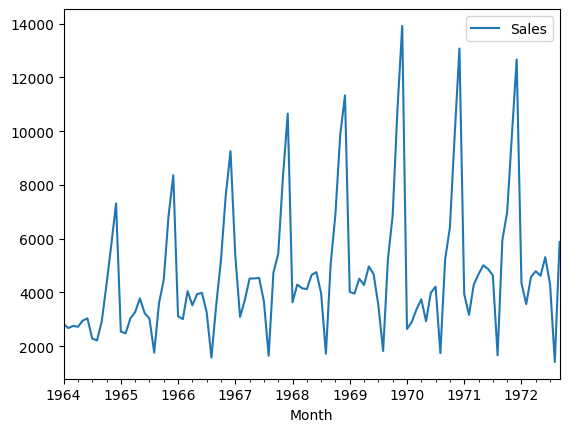

In [55]:
df.plot()

In [56]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [57]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [58]:
test_result=adfuller(df['Sales'])

In [59]:
# IF THE DATA IS NON STATIONARY